In [16]:
import pandas as pd
import numpy as np
import datetime
import yfinance as yf
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv("../../../data/sentiment_analysis_predictions/by_day/SPY.csv", parse_dates=["created_at"])
df.set_index("created_at", drop=True, inplace=True)

In [18]:
data = yf.download("SPY", start="2021-05-02", end="2022-05-01")

[*********************100%***********************]  1 of 1 completed


In [19]:
df

,Negative,Neutral,Positive,count,pos_minus_neg,pos_minus_neg_times_count
created_at,,,,,,
2021-05-01,0.364499,0.338692,0.296809,87,-0.067691,-5.889096
2021-05-02,0.353237,0.337489,0.309274,110,-0.043963,-4.835967
2021-05-03,0.473865,0.232569,0.293566,282,-0.180299,-50.844340
2021-05-04,0.467318,0.228605,0.304077,374,-0.163241,-61.052021
2021-05-05,0.501610,0.224523,0.273867,308,-0.227744,-70.145086
...,...,...,...,...,...,...
2022-04-26,0.439146,0.273064,0.287790,602,-0.151355,-91.115755
2022-04-27,0.448051,0.286386,0.265564,600,-0.182487,-109.492358
2022-04-28,0.474838,0.292044,0.233118,565,-0.241720,-136.571542


In [20]:
df_merged = pd.merge(df,data, how='inner', left_index=True, right_index=True)

In [21]:
#df_merged["prev_adj_close"] = df_merged["Adj Close"].shift(1)

## 3. Calculating Returns

In [22]:
# Return in percent
df_merged["return"] = df_merged["Adj Close"].pct_change()

In [23]:
df_merged["log_return"] = np.log(df_merged["Adj Close"]) - np.log(df_merged["Adj Close"].shift(1))

In [24]:
df_merged["log_return_shift"] = df_merged["log_return"].shift(-1)

In [25]:
df_merged["pos_minus_neg_diff"] = df_merged["pos_minus_neg"].diff(1)

In [26]:
df_merged["count_diff"] = df_merged["count"].diff(1)

In [27]:
df_merged.dropna(inplace=True)

In [28]:
df_merged

,Negative,Neutral,Positive,count,pos_minus_neg,pos_minus_neg_times_count,Open,High,Low,Close,Adj Close,Volume,return,log_return,log_return_shift,pos_minus_neg_diff,count_diff
2021-05-04,0.467318,0.228605,0.304077,374,-0.163241,-61.052021,416.070007,416.600006,411.670013,415.619995,408.457275,101591200,-0.006169,-0.006189,0.000313,0.017058,92.0
2021-05-05,0.501610,0.224523,0.273867,308,-0.227744,-70.145086,417.380005,417.630005,415.149994,415.750000,408.585022,60162200,0.000313,0.000313,0.007954,-0.064503,-66.0
2021-05-06,0.466016,0.237503,0.296481,418,-0.169535,-70.865820,415.829987,419.209991,413.679993,419.070007,411.847839,74321400,0.007986,0.007954,0.007252,0.058208,110.0
2021-05-07,0.464900,0.232654,0.302446,547,-0.162454,-88.862488,419.890015,422.820007,419.160004,422.119995,414.845215,67733800,0.007278,0.007252,-0.009952,0.007081,129.0
2021-05-10,0.556672,0.195418,0.247910,466,-0.308762,-143.883209,422.500000,422.739990,417.809998,417.940002,410.737305,81852400,-0.009902,-0.009952,-0.008965,-0.146308,-81.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-22,0.514130,0.252199,0.233671,645,-0.280458,-180.895673,436.910004,438.079987,425.440002,426.040009,424.207550,132471800,-0.027439,-0.027823,0.005781,-0.051080,217.0
2022-04-25,0.424861,0.290111,0.285028,576,-0.139833,-80.543813,423.670013,428.690002,418.839996,428.510010,426.666931,119647700,0.005798,0.005781,-0.029388,0.140625,-69.0
2022-04-26,0.439146,0.273064,0.287790,602,-0.151355,-91.115755,425.829987,426.040009,416.070007,416.100006,414.310303,103996300,-0.028961,-0.029388,0.002808,-0.011522,26.0
2022-04-27,0.448051,0.286386,0.265564,600,-0.182487,-109.492358,417.239990,422.920013,415.010010,417.269989,415.475250,122030000,0.002812,0.002808,0.024946,-0.031132,-2.0


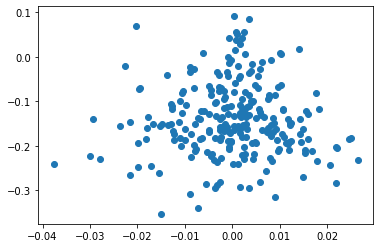

In [29]:
plt.scatter(df_merged["log_return_shift"], df_merged["pos_minus_neg"])
plt.show()

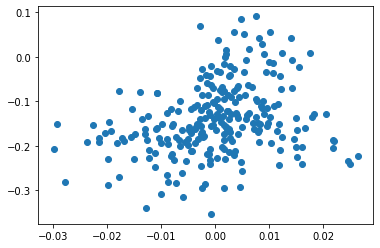

In [30]:
plt.scatter(df_merged["log_return"], df_merged["pos_minus_neg"])
plt.show()

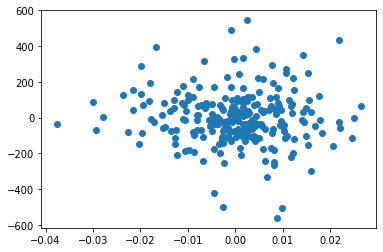

In [31]:
plt.scatter(df_merged["log_return_shift"], df_merged["count_diff"])
plt.show()

In [32]:
pos_minus_neg_log_return = stats.pearsonr(df_merged["log_return"], df_merged["pos_minus_neg"])
pos_minus_neg_log_return_shift = stats.pearsonr(df_merged["log_return_shift"], df_merged["pos_minus_neg"])

count_log_return = stats.pearsonr(df_merged["log_return"], df_merged["count"])
count_log_return_shift = stats.pearsonr(df_merged["log_return_shift"], df_merged["count"])

pos_minus_neg_times_count_log_return = stats.pearsonr(df_merged["log_return"], df_merged["pos_minus_neg_times_count"])
pos_minus_neg_times_count_log_return_shift = stats.pearsonr(df_merged["log_return_shift"], df_merged["pos_minus_neg_times_count"])

Positive_log_return = stats.pearsonr(df_merged["log_return"], df_merged["Positive"])
Positive_log_return_shift = stats.pearsonr(df_merged["log_return_shift"], df_merged["Positive"])

Negative_log_return = stats.pearsonr(df_merged["log_return"], df_merged["Negative"])
Negative_log_return_shift = stats.pearsonr(df_merged["log_return_shift"], df_merged["Negative"])

pos_minus_neg_diff_log_return = stats.pearsonr(df_merged["log_return"], df_merged["pos_minus_neg_diff"])
pos_minus_neg_diff_log_return_shift = stats.pearsonr(df_merged["log_return_shift"], df_merged["pos_minus_neg_diff"])

count_diff_log_return = stats.pearsonr(df_merged["log_return"], df_merged["count_diff"])
count_diff_log_return_shift = stats.pearsonr(df_merged["log_return_shift"], df_merged["count_diff"])

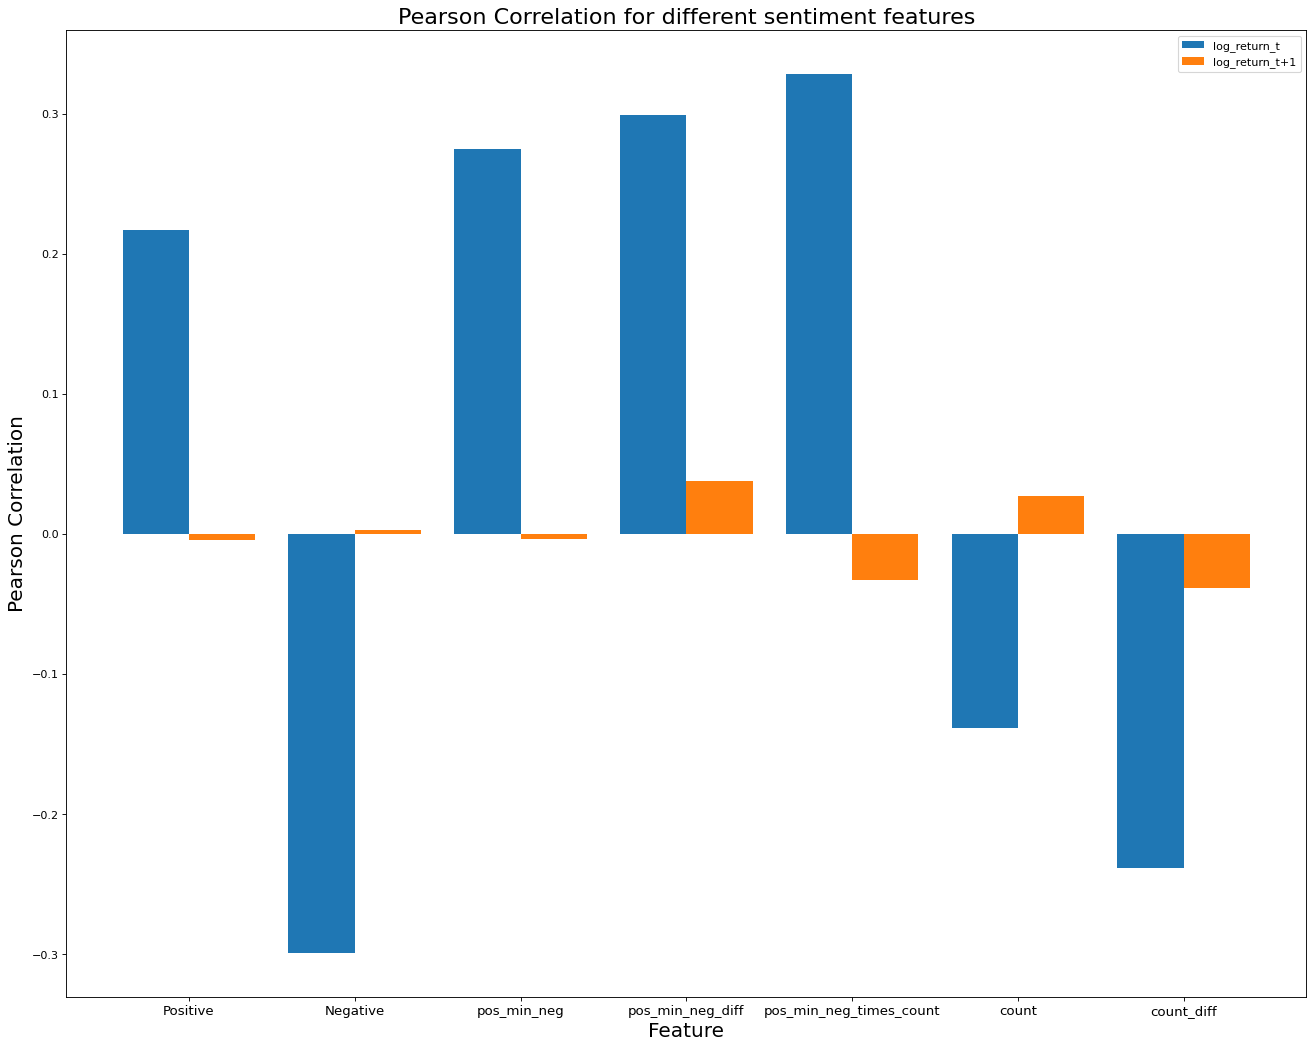

In [33]:
plt.figure(figsize=(20, 16), dpi=80)

X = ['Positive','Negative','pos_min_neg','pos_min_neg_diff', "pos_min_neg_times_count", "count", "count_diff"]
Y_log_return= [Positive_log_return[0],Negative_log_return[0],pos_minus_neg_log_return[0],pos_minus_neg_diff_log_return[0], pos_minus_neg_times_count_log_return[0], count_log_return[0], count_diff_log_return[0]]
Z_log_return_shift = [Positive_log_return_shift[0],Negative_log_return_shift[0],pos_minus_neg_log_return_shift[0],pos_minus_neg_diff_log_return_shift[0], pos_minus_neg_times_count_log_return_shift[0], count_log_return_shift[0], count_diff_log_return_shift[0]]

X_axis = np.arange(len(X))

plt.bar(X_axis -0.2, Y_log_return, 0.4,  label = 'log_return_t')
plt.bar(X_axis +0.2, Z_log_return_shift, 0.4, label = 'log_return_t+1')

plt.xticks(X_axis, X, size=12)
plt.xlabel("Feature", size=18)
plt.ylabel("Pearson Correlation", size=18)
plt.title("Pearson Correlation for different sentiment features", size=20)
plt.legend()
plt.show()

In [34]:
Y_log_return= [Positive_log_return[1],
               Negative_log_return[1],
               pos_minus_neg_log_return[1],
               pos_minus_neg_diff_log_return[1],
               pos_minus_neg_times_count_log_return[1],
               count_log_return[1],
               count_diff_log_return[1]]

In [38]:
Z_log_return_shift = [Positive_log_return_shift[1],
                      Negative_log_return_shift[1],pos_minus_neg_log_return_shift[1],pos_minus_neg_diff_log_return_shift[1], pos_minus_neg_times_count_log_return_shift[1], count_log_return_shift[1], count_diff_log_return_shift[1]]

In [39]:
Z_log_return_shift

[0.9507608935613677,
 0.9666525206829785,
 0.955878069151112,
 0.5508686315913268,
 0.6048643241438928,
 0.6673355871850355,
 0.5416081289447643]

In [19]:
df_excel = pd.DataFrame(data={"Feature": X, "Log_return_t": Y_log_return, "Log_return_t+1": Z_log_return_shift})

In [20]:
df_excel.to_excel("corr_results_SPY.xlsx")

In [54]:
df_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Feature         7 non-null      object 
 1   Log_return_t    7 non-null      float64
 2   Log_return_t+1  7 non-null      float64
dtypes: float64(2), object(1)
memory usage: 296.0+ bytes


<AxesSubplot:>

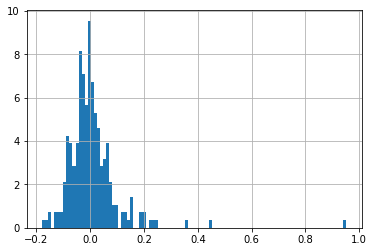

In [14]:
ax = sns.barplot(x="day", y="total_bill", hue="sex", data=df_excel)

## 4. Descriptive and inferential statistics

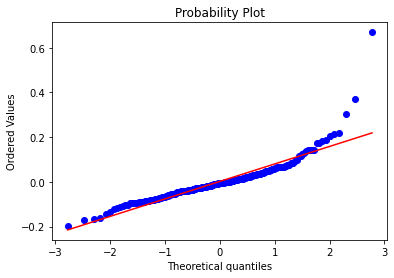

In [15]:
stats.probplot(df_merged["log_return"].dropna(), dist="norm", plot=plt)
plt.show()

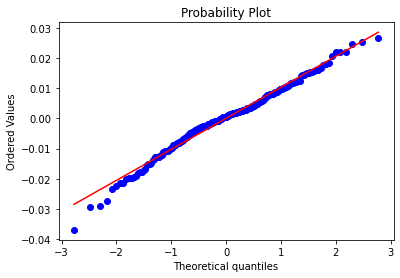

In [68]:
stats.probplot(df_merged["return"].dropna(), dist="norm", plot=plt)
plt.show()

In [60]:
np.e**1.38629

3.999982555558476

<AxesSubplot:>

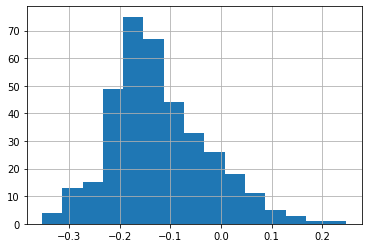

In [12]:
df["pos_minus_neg"].hist(bins=15, )